# **ASSIGNMENT 3 - CONVOLUTIONAL NETWORKS**

**DOWNLOADING THE DATA:**

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nikkichigurupati268","key":"ab0b0a75c988ffe06ccf802ad40e7c46"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:36<00:00, 22.8MB/s]
100% 812M/812M [00:36<00:00, 23.6MB/s]


In [ ]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

**COPYING THE IMAGES TO TRAINING, VALIDATION AND TEST DIRECTORIES**

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

**TRAINING THE CONVENT NETWORK FROM SCRATCH:**

**MODEL 1: TRAINING SAMPLE OF 1000, VALIDATION SAMPLE OF 500 AND TEST SAMPLE OF 500**

In [ ]:
make_subset("test", start_index=0, end_index=500)
make_subset("validation", start_index=500, end_index=1000)
make_subset("train", start_index=1000, end_index=2000)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#Instantiating a small convnet for dogs vs. cats classification:

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
Model_1 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
Model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [ ]:
#Configuring the model for training:

Model_1.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**DATA PREPROCESSING:**

In [ ]:
#Using image_dataset_from_directory to read images

from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)
    

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [ ]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [ ]:
#Displaying the shapes of the data and labels yielded by the Dataset:

for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break
     

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
#Fitting the model using a Dataset

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = Model_1.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 14s 27ms/step - loss: 0.7001 - accuracy: 0.4915 - val_loss: 0.6923 - val_accuracy: 0.5260
Epoch 2/30
63/63 [==============================] - 1s 17ms/step - loss: 0.6964 - accuracy: 0.5440 - val_loss: 0.6817 - val_accuracy: 0.5490
Epoch 3/30
63/63 [==============================] - 1s 17ms/step - loss: 0.6644 - accuracy: 0.5975 - val_loss: 0.6501 - val_accuracy: 0.6040
Epoch 4/30
63/63 [==============================] - 1s 17ms/step - loss: 0.6523 - accuracy: 0.6210 - val_loss: 0.6406 - val_accuracy: 0.6300
Epoch 5/30
63/63 [==============================] - 1s 17ms/step - loss: 0.6333 - accuracy: 0.6375 - val_loss: 0.6210 - val_accuracy: 0.6520
Epoch 6/30
63/63 [==============================] - 1s 17ms/step - loss: 0.6200 - accuracy: 0.6705 - val_loss: 0.6085 - val_accuracy: 0.6570
Epoch 7/30
63/63 [==============================] - 1s 17ms/step - loss: 0.5753 - accuracy: 0.7055 - val_loss: 0.6028 - val_accuracy: 0.6580
Epoch 8/30
6

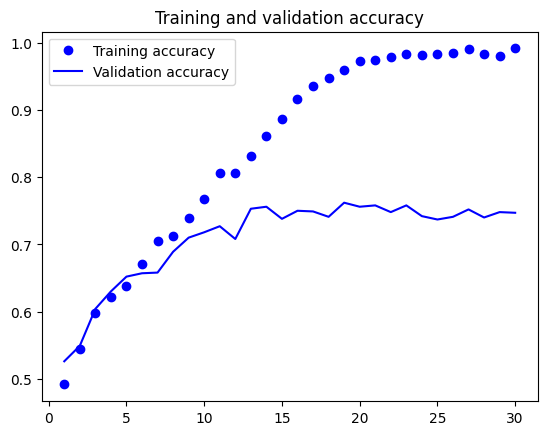

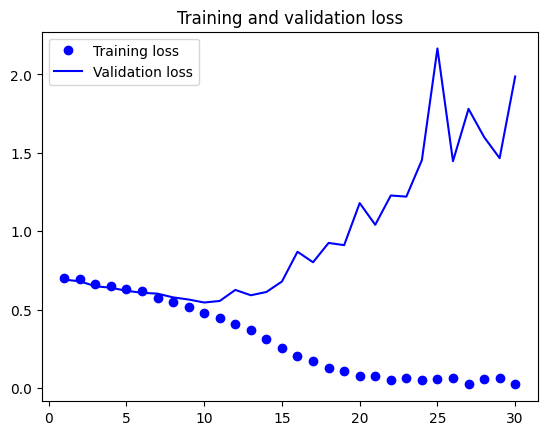

In [ ]:
#Displaying curves of loss and accuracy during training:

import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()#

In [ ]:
#Evaluating the model on the test set:

test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 0s 7ms/step - loss: 0.5312 - accuracy: 0.7290
Test accuracy: 0.729


**REDUCING THE OVERFITTING MODELS**

**MODEL 2- USING DATA AUGMENTATION:**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
Model_2 = keras.Model(inputs=inputs, outputs=outputs)

Model_2.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = Model_2.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
     callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 4s 21ms/step - loss: 0.6961 - accuracy: 0.5070 - val_loss: 0.8557 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 1s 19ms/step - loss: 0.6936 - accuracy: 0.5275 - val_loss: 0.6896 - val_accuracy: 0.5480
Epoch 3/30
63/63 [==============================] - 1s 18ms/step - loss: 0.6916 - accuracy: 0.5465 - val_loss: 0.6784 - val_accuracy: 0.5480
Epoch 4/30
63/63 [==============================] - 1s 18ms/step - loss: 0.6839 - accuracy: 0.5755 - val_loss: 0.6626 - val_accuracy: 0.5870
Epoch 5/30
63/63 [==============================] - 1s 18ms/step - loss: 0.6490 - accuracy: 0.6265 - val_loss: 0.7432 - val_accuracy: 0.5400
Epoch 6/30
63/63 [==============================] - 1s 19ms/step - loss: 0.6387 - accuracy: 0.6355 - val_loss: 0.6265 - val_accuracy: 0.6400
Epoch 7/30
63/63 [==============================] - 1s 18ms/step - loss: 0.6178 - accuracy: 0.6485 - val_loss: 0.6731 - val_accuracy: 0.6500
Epoch 8/30
63

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")


32/32 [==============================] - 0s 8ms/step - loss: 0.4188 - accuracy: 0.8010
Test accuracy: 0.801


In [ ]:
#Defining a data augmentation stage to add to an image model:

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

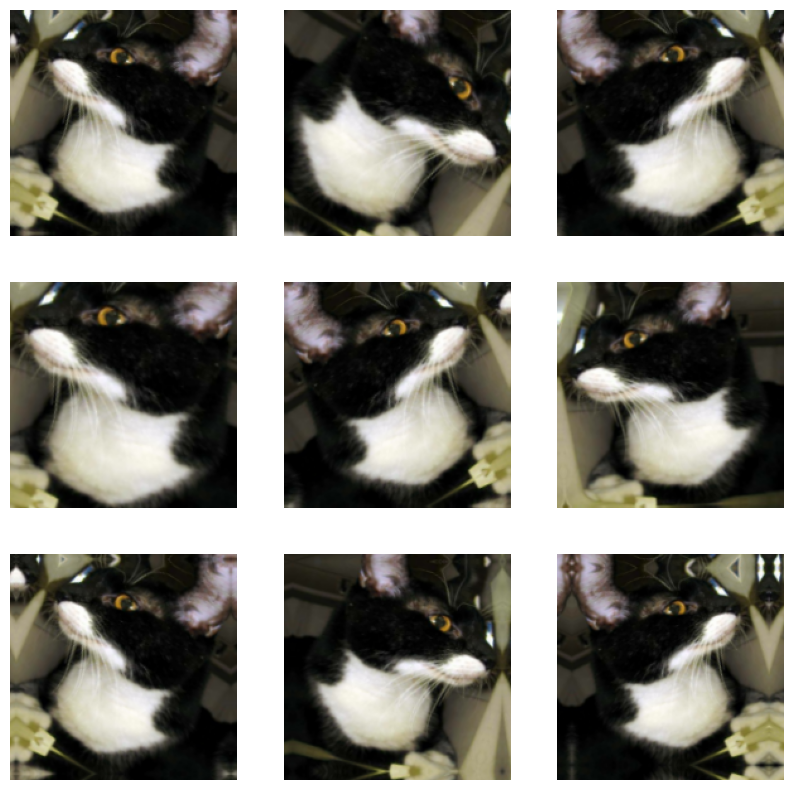

In [ ]:
#Displaying some randomly augmented training images

plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**MODEL 3 - DROPOUT METHOD**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
Model_3 = keras.Model(inputs=inputs, outputs=outputs)

Model_3.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_dropout.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = Model_3.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 3s 19ms/step - loss: 0.7012 - accuracy: 0.5100 - val_loss: 0.6917 - val_accuracy: 0.6150
Epoch 2/30
63/63 [==============================] - 1s 17ms/step - loss: 0.7028 - accuracy: 0.5400 - val_loss: 0.6805 - val_accuracy: 0.5720
Epoch 3/30
63/63 [==============================] - 1s 17ms/step - loss: 0.6838 - accuracy: 0.5700 - val_loss: 0.6761 - val_accuracy: 0.5720
Epoch 4/30
63/63 [==============================] - 1s 17ms/step - loss: 0.6643 - accuracy: 0.6115 - val_loss: 0.6486 - val_accuracy: 0.5940
Epoch 5/30
63/63 [==============================] - 1s 17ms/step - loss: 0.6420 - accuracy: 0.6425 - val_loss: 0.6015 - val_accuracy: 0.6680
Epoch 6/30
63/63 [==============================] - 1s 16ms/step - loss: 0.6052 - accuracy: 0.6695 - val_loss: 0.5799 - val_accuracy: 0.7110
Epoch 7/30
63/63 [==============================] - 1s 16ms/step - loss: 0.5913 - accuracy: 0.6895 - val_loss: 0.6466 - val_accuracy: 0.6530
Epoch 8/30
63

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_dropout.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 0s 7ms/step - loss: 0.4816 - accuracy: 0.7720
Test accuracy: 0.772


**MODEL 4 - DATA AUGMENTATION AND DROPOUT METHOD:**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
Model_4 = keras.Model(inputs=inputs, outputs=outputs)

Model_4.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation_dropout.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = Model_4.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 4s 21ms/step - loss: 0.7014 - accuracy: 0.5010 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 1s 19ms/step - loss: 0.6932 - accuracy: 0.5120 - val_loss: 0.6900 - val_accuracy: 0.5220
Epoch 3/30
63/63 [==============================] - 1s 19ms/step - loss: 0.6938 - accuracy: 0.5335 - val_loss: 0.6812 - val_accuracy: 0.5960
Epoch 4/30
63/63 [==============================] - 1s 18ms/step - loss: 0.6965 - accuracy: 0.5795 - val_loss: 0.6641 - val_accuracy: 0.5830
Epoch 5/30
63/63 [==============================] - 1s 18ms/step - loss: 0.6633 - accuracy: 0.5915 - val_loss: 0.7254 - val_accuracy: 0.5740
Epoch 6/30
63/63 [==============================] - 1s 19ms/step - loss: 0.6539 - accuracy: 0.6060 - val_loss: 0.6242 - val_accuracy: 0.6440
Epoch 7/30
63/63 [==============================] - 1s 18ms/step - loss: 0.6438 - accuracy: 0.6425 - val_loss: 0.6577 - val_accuracy: 0.6480
Epoch 8/30
63

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation_dropout.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 0s 8ms/step - loss: 0.4282 - accuracy: 0.8010
Test accuracy: 0.801


**MODEL 5 - INCREASING THE TRAINING SAMPLE SIZE TO 5000, INCLUDING MAXPOOLING, DATA AUGMENTATION AND DROPOUT TECHNIQUE (DROPOUT RATE = 0.05)**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

make_subset("train_1", start_index=0, end_index=5000)
make_subset("validation_1", start_index=5000, end_index=5500)
make_subset("test_1", start_index=5500, end_index=6000)

train_dataset_1 = image_dataset_from_directory(
    new_base_dir / "train_1",
    image_size=(180, 180),
    batch_size=32)
validation_dataset_1 = image_dataset_from_directory(
    new_base_dir / "validation_1",
    image_size=(180, 180),
    batch_size=32)
test_dataset_1 = image_dataset_from_directory(
    new_base_dir / "test_1",
    image_size=(180, 180),
    batch_size=32)

Found 10000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
#Defining a new convnet that includes image augmentation and dropout

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
Model_5 = keras.Model(inputs=inputs, outputs=outputs)

Model_5.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras import regularizers

early_stopping_monitor = EarlyStopping(patience=10)

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

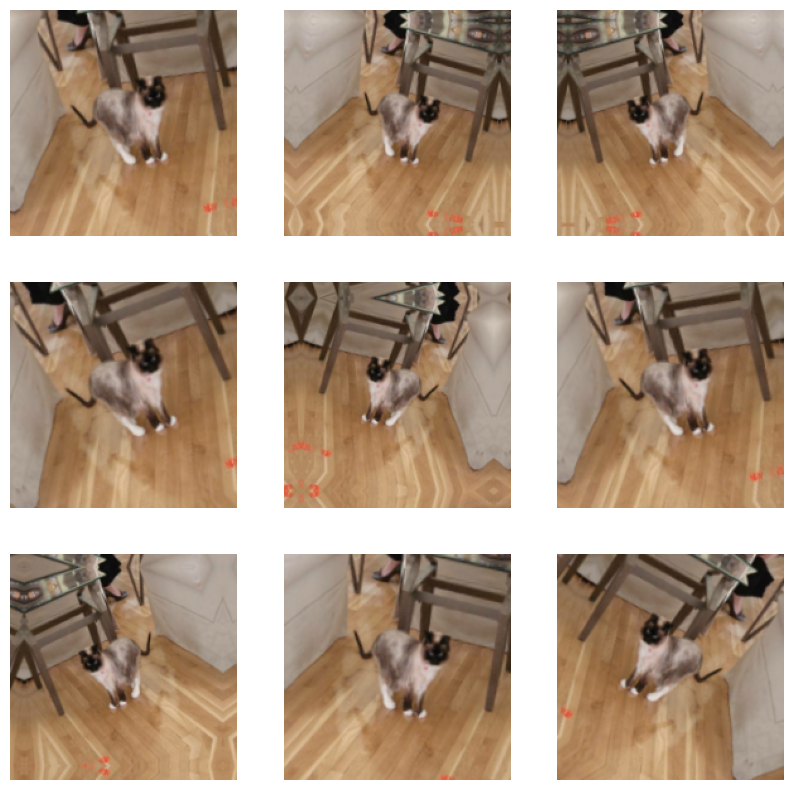

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"), early_stopping_monitor
]
history = Model_5.fit(
    train_dataset_1,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
313/313 [==============================] - 6s 13ms/step - loss: 0.6808 - accuracy: 0.5723 - val_loss: 0.6253 - val_accuracy: 0.6500
Epoch 2/30
313/313 [==============================] - 4s 13ms/step - loss: 0.5870 - accuracy: 0.6887 - val_loss: 0.5422 - val_accuracy: 0.7460
Epoch 3/30
313/313 [==============================] - 4s 13ms/step - loss: 0.4978 - accuracy: 0.7612 - val_loss: 0.4955 - val_accuracy: 0.7580
Epoch 4/30
313/313 [==============================] - 4s 13ms/step - loss: 0.4350 - accuracy: 0.8020 - val_loss: 0.4767 - val_accuracy: 0.7800
Epoch 5/30
313/313 [==============================] - 4s 13ms/step - loss: 0.3769 - accuracy: 0.8313 - val_loss: 0.2747 - val_accuracy: 0.9010
Epoch 6/30
313/313 [==============================] - 4s 13ms/step - loss: 0.3218 - accuracy: 0.8610 - val_loss: 0.2285 - val_accuracy: 0.9080
Epoch 7/30
313/313 [==============================] - 4s 13ms/step - loss: 0.2813 - accuracy: 0.8843 - val_loss: 0.2164 - val_accuracy: 0.9130

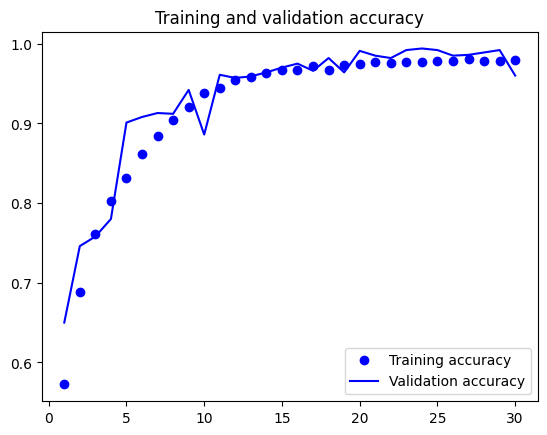

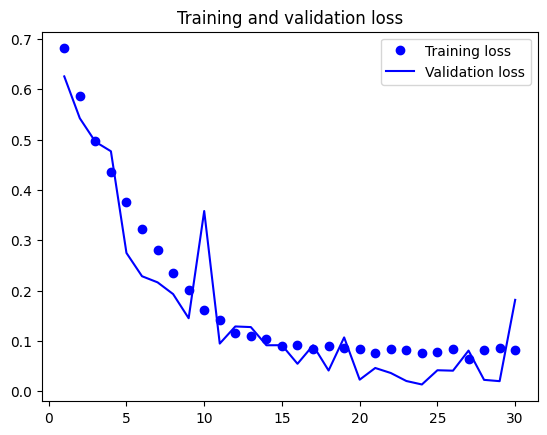

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset_1)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 0s 7ms/step - loss: 0.7739 - accuracy: 0.8710
Test accuracy: 0.871


**MODEL 6 - INCREASING THE TRAINING SAMPLE TO 10000**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory


make_subset("train_4", start_index=0, end_index=10000)
make_subset("validation_4", start_index=10000, end_index=10500)
make_subset("test_4", start_index=10500, end_index=11000)

train_dataset_4 = image_dataset_from_directory(
    new_base_dir / "train_4",
    image_size=(180, 180),
    batch_size=32)
validation_dataset_4 = image_dataset_from_directory(
    new_base_dir / "validation_4",
    image_size=(180, 180),
    batch_size=32)
test_dataset_4 = image_dataset_from_directory(
    new_base_dir / "test_4",
    image_size=(180, 180),
    batch_size=32)

Found 20000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
Model_6 = keras.Model(inputs=inputs, outputs=outputs)

Model_6.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

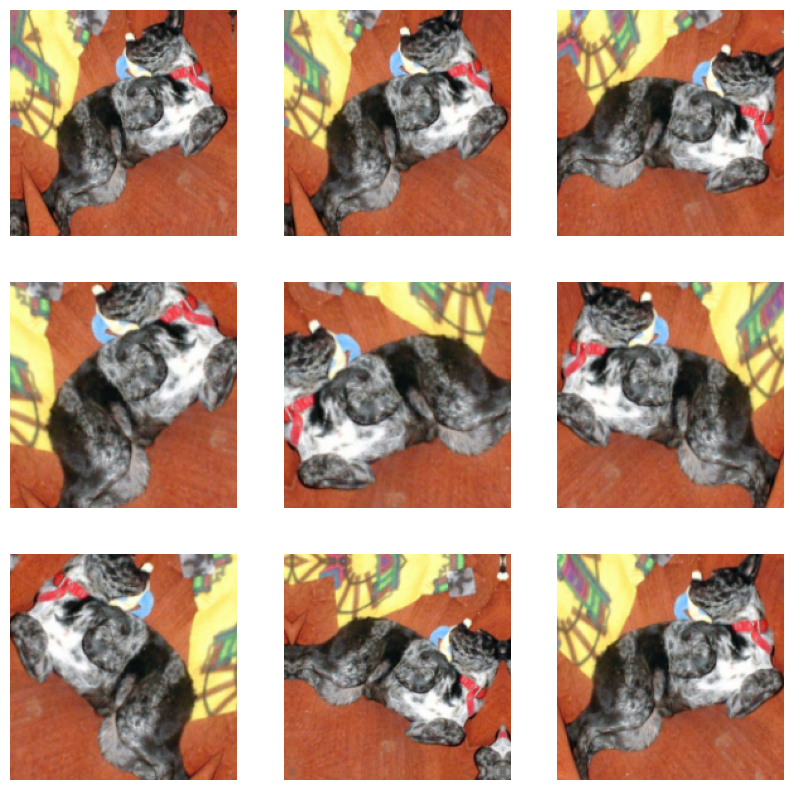

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"), early_stopping_monitor
]
history = Model_6.fit(
    train_dataset_4,
    epochs=30,
    validation_data=validation_dataset_4,
    callbacks=callbacks)

Epoch 1/30
625/625 [==============================] - 10s 12ms/step - loss: 0.6536 - accuracy: 0.6022 - val_loss: 0.6043 - val_accuracy: 0.7130
Epoch 2/30
625/625 [==============================] - 8s 12ms/step - loss: 0.5173 - accuracy: 0.7454 - val_loss: 0.6364 - val_accuracy: 0.7070
Epoch 3/30
625/625 [==============================] - 8s 12ms/step - loss: 0.4196 - accuracy: 0.8130 - val_loss: 0.4026 - val_accuracy: 0.8380
Epoch 4/30
625/625 [==============================] - 8s 12ms/step - loss: 0.3524 - accuracy: 0.8486 - val_loss: 0.3474 - val_accuracy: 0.8470
Epoch 5/30
625/625 [==============================] - 8s 12ms/step - loss: 0.2920 - accuracy: 0.8779 - val_loss: 0.3396 - val_accuracy: 0.8770
Epoch 6/30
625/625 [==============================] - 8s 12ms/step - loss: 0.2499 - accuracy: 0.8975 - val_loss: 0.2960 - val_accuracy: 0.8990
Epoch 7/30
625/625 [==============================] - 8s 12ms/step - loss: 0.2126 - accuracy: 0.9125 - val_loss: 0.2487 - val_accuracy: 0.905

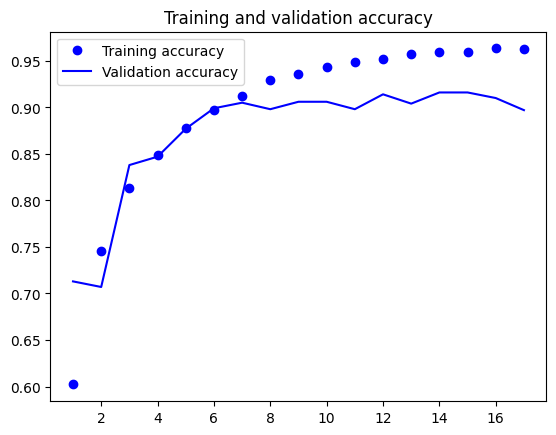

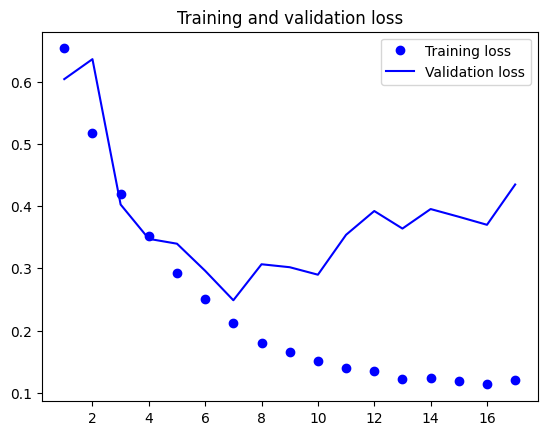

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset_4)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 0s 7ms/step - loss: 0.2901 - accuracy: 0.8970
Test accuracy: 0.897


**INSTANTIATING AND FREEZING THE VGG16 CONVOLUTIONAL BASE**

**PRE-TRAINED MODEL**


**MODEL 7 - SAMPLE SIZE OF 1000**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
#Adding a data augmentation stage and a classifier to the convolutional base:

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
Model_7 = keras.Model(inputs, outputs)
Model_7.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = Model_7.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 6s 47ms/step - loss: 4.1128 - accuracy: 0.7285 - val_loss: 0.7786 - val_accuracy: 0.9070
Epoch 2/30
63/63 [==============================] - 2s 33ms/step - loss: 1.1531 - accuracy: 0.8620 - val_loss: 0.3983 - val_accuracy: 0.9420
Epoch 3/30
63/63 [==============================] - 2s 33ms/step - loss: 0.6563 - accuracy: 0.8955 - val_loss: 0.2603 - val_accuracy: 0.9570
Epoch 4/30
63/63 [==============================] - 2s 28ms/step - loss: 0.3198 - accuracy: 0.9305 - val_loss: 0.2681 - val_accuracy: 0.9620
Epoch 5/30
63/63 [==============================] - 2s 28ms/step - loss: 0.2687 - accuracy: 0.9395 - val_loss: 0.2612 - val_accuracy: 0.9600
Epoch 6/30
63/63 [==============================] - 2s 33ms/step - loss: 0.2307 - accuracy: 0.9510 - val_loss: 0.2149 - val_accuracy: 0.9610
Epoch 7/30
63/63 [==============================] - 2s 32ms/step - loss: 0.2064 - accuracy: 0.9470 - val_loss: 0.2116 - val_accuracy: 0.9710
Epoch 8/30
63

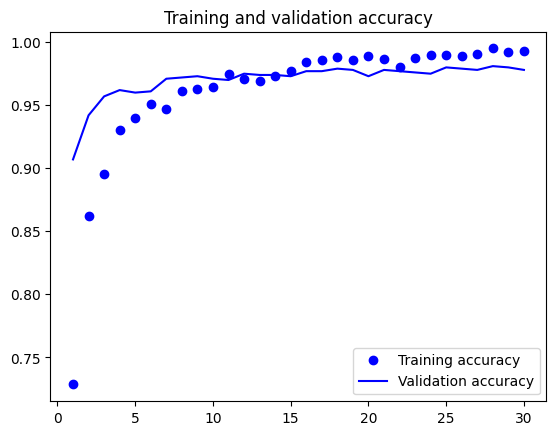

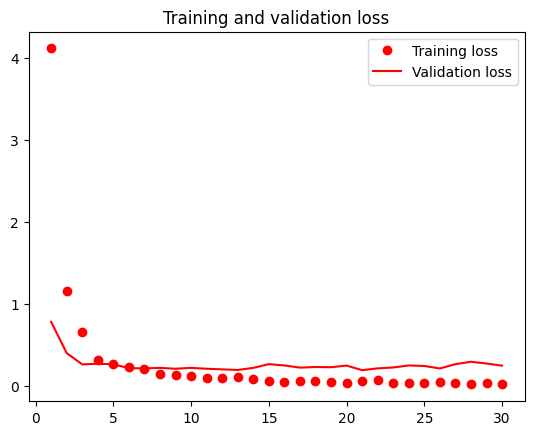

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 17ms/step - loss: 0.1688 - accuracy: 0.9750
Test accuracy: 0.975


**MODEL 8 - SAMPLE SIZE OF 5000**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
Model_8 = keras.Model(inputs, outputs)
Model_8.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = Model_8.fit(
    train_dataset_1,
    epochs=10,
    validation_data=validation_dataset_1,
    callbacks=callbacks)

Epoch 1/10
313/313 [==============================] - 9s 22ms/step - loss: 1.3560 - accuracy: 0.8598 - val_loss: 0.1516 - val_accuracy: 0.9600
Epoch 2/10
313/313 [==============================] - 7s 21ms/step - loss: 0.2242 - accuracy: 0.9290 - val_loss: 0.1161 - val_accuracy: 0.9740
Epoch 3/10
313/313 [==============================] - 7s 21ms/step - loss: 0.1520 - accuracy: 0.9456 - val_loss: 0.1015 - val_accuracy: 0.9760
Epoch 4/10
313/313 [==============================] - 7s 21ms/step - loss: 0.1151 - accuracy: 0.9589 - val_loss: 0.0858 - val_accuracy: 0.9750
Epoch 5/10
313/313 [==============================] - 6s 20ms/step - loss: 0.0984 - accuracy: 0.9651 - val_loss: 0.0942 - val_accuracy: 0.9760
Epoch 6/10
313/313 [==============================] - 6s 20ms/step - loss: 0.0973 - accuracy: 0.9693 - val_loss: 0.0913 - val_accuracy: 0.9780
Epoch 7/10
313/313 [==============================] - 6s 20ms/step - loss: 0.0883 - accuracy: 0.9712 - val_loss: 0.1041 - val_accuracy: 0.9770

In [ ]:
model = keras.models.load_model("fine_tuning2.keras")
test_loss, test_acc = model.evaluate(test_dataset_1)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 17ms/step - loss: 0.0844 - accuracy: 0.9810
Test accuracy: 0.981


**MODEL 9 - SAMPLE SIZE OF 10000**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
Model_9 = keras.Model(inputs, outputs)
Model_9.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning3.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = Model_9.fit(
    train_dataset_4,
    epochs=10,
    validation_data=validation_dataset_4,
    callbacks=callbacks)

Epoch 1/10
625/625 [==============================] - 15s 20ms/step - loss: 0.7022 - accuracy: 0.9070 - val_loss: 0.1497 - val_accuracy: 0.9650
Epoch 2/10
625/625 [==============================] - 12s 20ms/step - loss: 0.1416 - accuracy: 0.9521 - val_loss: 0.1619 - val_accuracy: 0.9710
Epoch 3/10
625/625 [==============================] - 13s 20ms/step - loss: 0.1048 - accuracy: 0.9635 - val_loss: 0.1399 - val_accuracy: 0.9720
Epoch 4/10
625/625 [==============================] - 12s 20ms/step - loss: 0.0938 - accuracy: 0.9677 - val_loss: 0.1477 - val_accuracy: 0.9730
Epoch 5/10
625/625 [==============================] - 13s 20ms/step - loss: 0.0862 - accuracy: 0.9721 - val_loss: 0.1293 - val_accuracy: 0.9850
Epoch 6/10
625/625 [==============================] - 12s 20ms/step - loss: 0.0798 - accuracy: 0.9736 - val_loss: 0.1477 - val_accuracy: 0.9810
Epoch 7/10
625/625 [==============================] - 12s 20ms/step - loss: 0.0772 - accuracy: 0.9757 - val_loss: 0.1485 - val_accuracy:

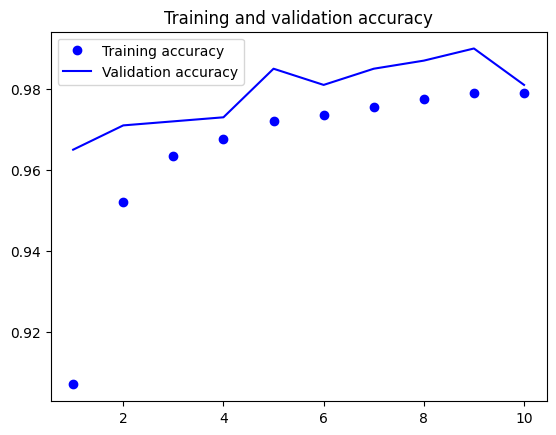

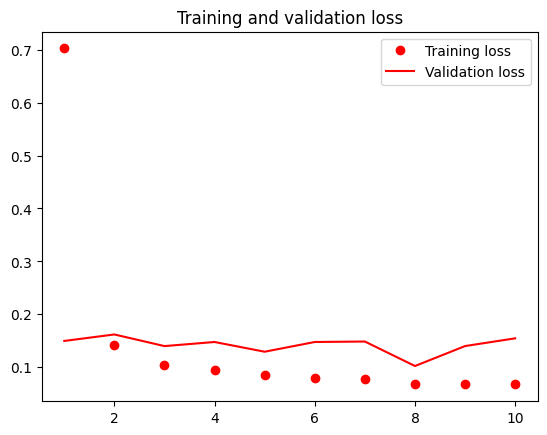

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
model = keras.models.load_model("fine_tuning3.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 17ms/step - loss: 0.0346 - accuracy: 0.9910
Test accuracy: 0.991


**SCRATCH MODELS:**

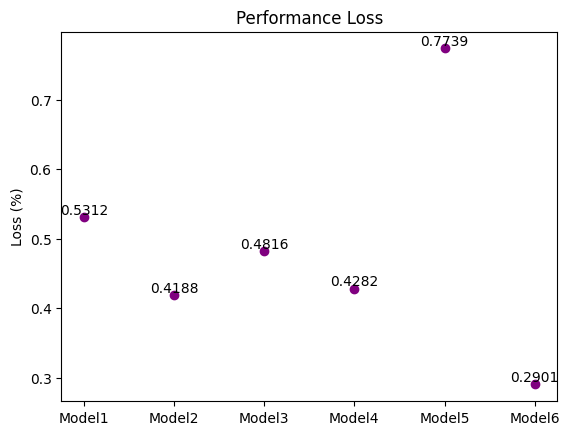

In [ ]:
loss_dict = {'Model1': 0.5312, 'Model2': 0.4188, 'Model3': 0.4816, 'Model4': 0.4282,
             'Model5': 0.7739, 'Model6': 0.2901}

# Get model names and loss values as separate lists
models = list(loss_dict.keys())
losses = list(loss_dict.values())

# Plot the scatter plot with labels
plt.scatter(models, losses, color='purple')
plt.title('Performance Loss')
plt.ylabel('Loss (%)')

for (xi, yi) in zip(models, losses):
    plt.text(xi, yi, str(yi), va='bottom', ha='center')

plt.show()
     

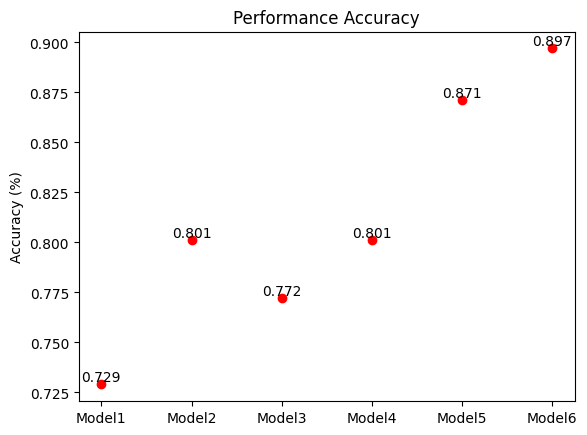

In [ ]:
import matplotlib.pyplot as plt

# Create a dictionary with model names as keys and accuracy values as values
acc_dict = {'Model1': 0.729, 'Model2': 0.801, 'Model3': 0.772, 'Model4': 0.801,
            'Model5': 0.871, 'Model6': 0.897}

# Get model names and accuracy values as separate lists
models = list(acc_dict.keys())
accuracy = list(acc_dict.values())

# Plot the scatter plot with labels
plt.scatter(models, accuracy, color='red')
plt.title('Performance Accuracy')
plt.ylabel('Accuracy (%)')

for (xi, yi) in zip(models, accuracy):
  plt.text(xi, yi, str(yi), va='bottom', ha='center')

plt.show()

**PRE-TRAINED MODELS:**

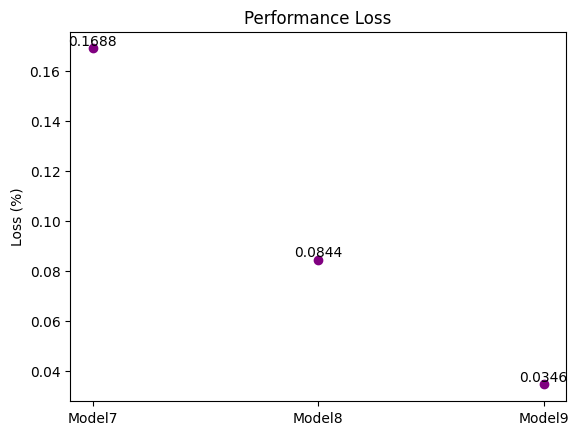

In [ ]:
loss_dict = {'Model7': 0.1688, 'Model8': 0.0844, 'Model9': 0.0346}

# Get model names and loss values as separate lists
models = list(loss_dict.keys())
losses = list(loss_dict.values())

# Plot the scatter plot with labels
plt.scatter(models, losses, color='purple')
plt.title('Performance Loss')
plt.ylabel('Loss (%)')

for (xi, yi) in zip(models, losses):
    plt.text(xi, yi, str(yi), va='bottom', ha='center')

plt.show()

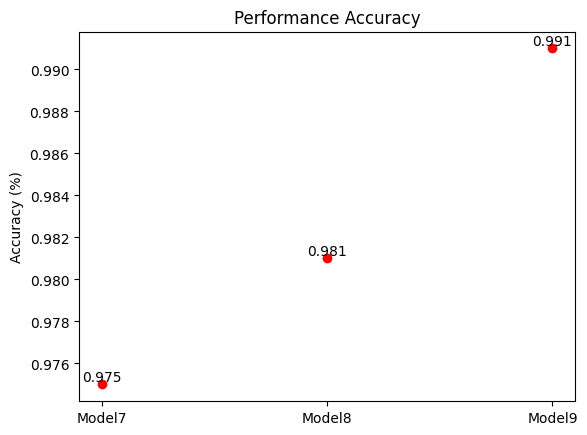

In [ ]:
# Create a dictionary with model names as keys and accuracy values as values
acc_dict = {'Model7': 0.975, 'Model8': 0.981, 'Model9': 0.991}

# Get model names and accuracy values as separate lists
models = list(acc_dict.keys())
accuracy = list(acc_dict.values())

# Plot the scatter plot with labels
plt.scatter(models, accuracy, color='red')
plt.title('Performance Accuracy')
plt.ylabel('Accuracy (%)')

for (xi, yi) in zip(models, accuracy):
  plt.text(xi, yi, str(yi), va='bottom', ha='center')

plt.show()